# **Stock Price Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk as nltk
import yfinance as yf

In [3]:
import sys
sys.path.append('../')
news = pd.read_csv('../docs/raw_analyst_ratings.csv')

## Exploratory Data Analysis

>> ### Descriptive Statistics

In [3]:
news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# headline length
news['headline_length'] = news['headline'].str.len()

# other statistics
mean_length = news['headline_length'].mean()
median_length = news['headline_length'].median()
mode_length = news['headline_length'].mode().tolist()
min_length = news['headline_length'].min()
max_length = news['headline_length'].max()
std_dev = news['headline_length'].std()

# Print the results
print("Mean headline length:", mean_length)
print("Median headline length:", median_length)
print("Mode headline length:", mode_length)
print("Minimum headline length:", min_length)
print("Maximum headline length:", max_length)
print("Standard Deviation of headline length:", std_dev)


Mean headline length: 73.12051490484095
Median headline length: 64.0
Mode headline length: [47]
Minimum headline length: 3
Maximum headline length: 512
Standard Deviation of headline length: 40.73530993195065


In [5]:
# Number of articles per publisher
publisher_counts = news['publisher'].value_counts()
publisher_counts_sorted = publisher_counts.sort_values(ascending=False)
print(publisher_counts_sorted)

publisher
Paul Quintaro                228373
Lisa Levin                   186979
Benzinga Newsdesk            150484
Charles Gross                 96732
Monica Gerson                 82380
                              ...  
Holly Huber - CrowdStreet         1
Marvin Dumont                     1
Ryan Smith                        1
Frank Ochoa                       1
Jeremie Capron                    1
Name: count, Length: 1034, dtype: int64


In [6]:
# Count number of missing dates
error_count= news['date'].isna().sum()
print(f"Number of missing dates: {error_count}")

Number of missing dates: 0


In [7]:
# Format date
from scripts.dateFormat import formatDate
news['date']=formatDate(news)

news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month_name()
news['day'] = news['date'].dt.day
news['day_of_week'] = news['date'].dt.day_name()


month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

news['month'] = pd.Categorical(news['month'], categories=month_order, ordered=True)


In [8]:
news.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020,June,5,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020,June,3,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020,May,26,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020,May,22,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020,May,22,Friday


In [9]:
# Count articles by year, month, day, and day of the week
articles_by_year = news.groupby('year').size()
articles_by_month = news.groupby('month').size()
articles_by_day = news.groupby('day').size()
articles_by_day_of_week = news.groupby('day_of_week').size()

/tmp/ipykernel_6382/2834599596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  articles_by_month = news.groupby('month').size()


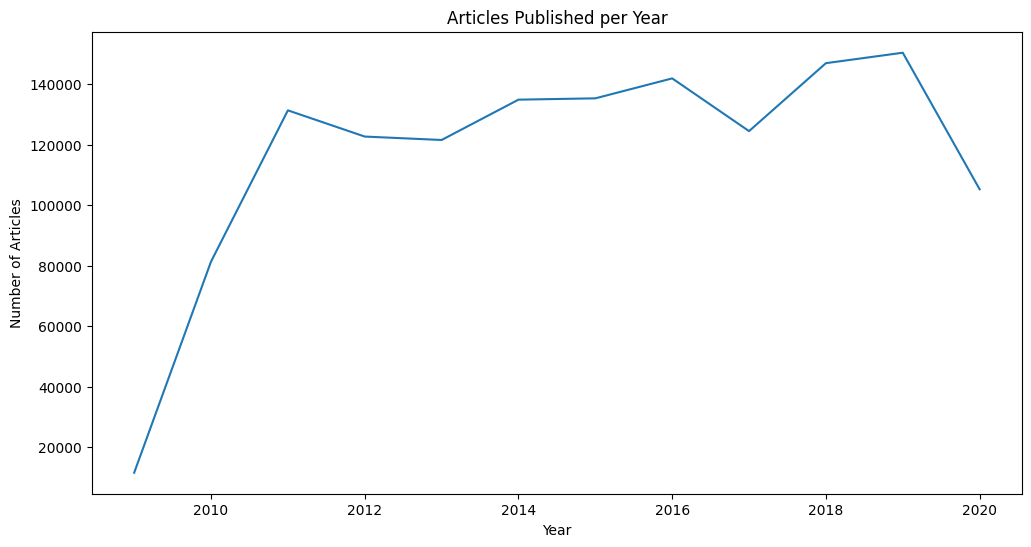

In [10]:
# Visualize trends
plt.figure(figsize=(12, 6))
plt.plot(articles_by_year.index, articles_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Year')
plt.show()

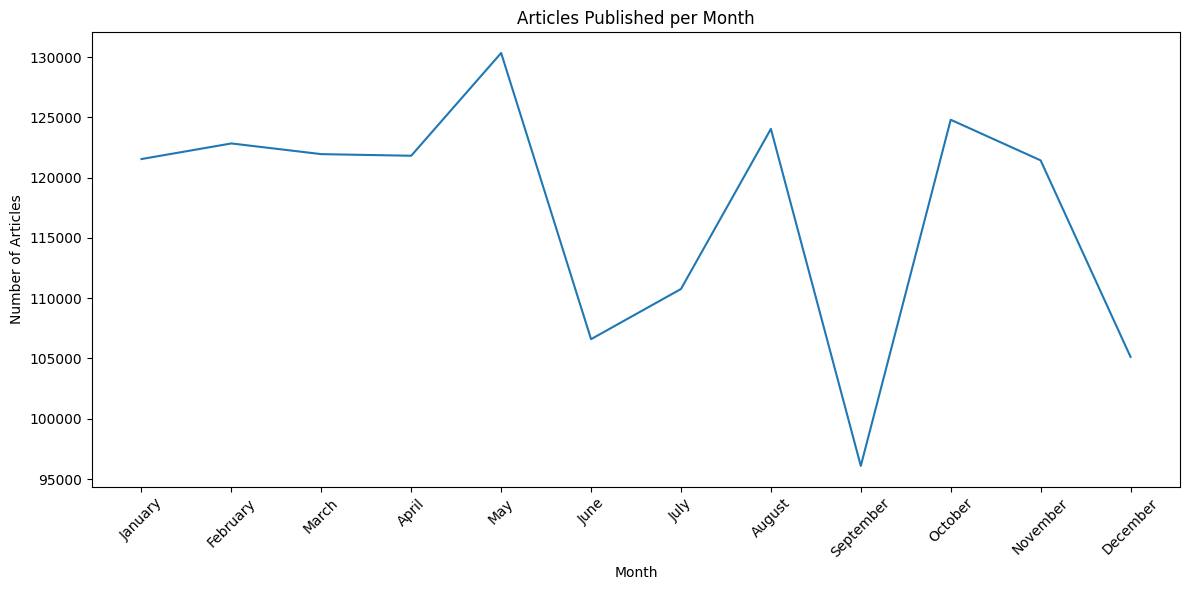

In [11]:
# Visualize articles by month
plt.figure(figsize=(12, 6))
plt.plot(articles_by_month.index, articles_by_month.values)
plt.xticks(articles_by_month.index)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

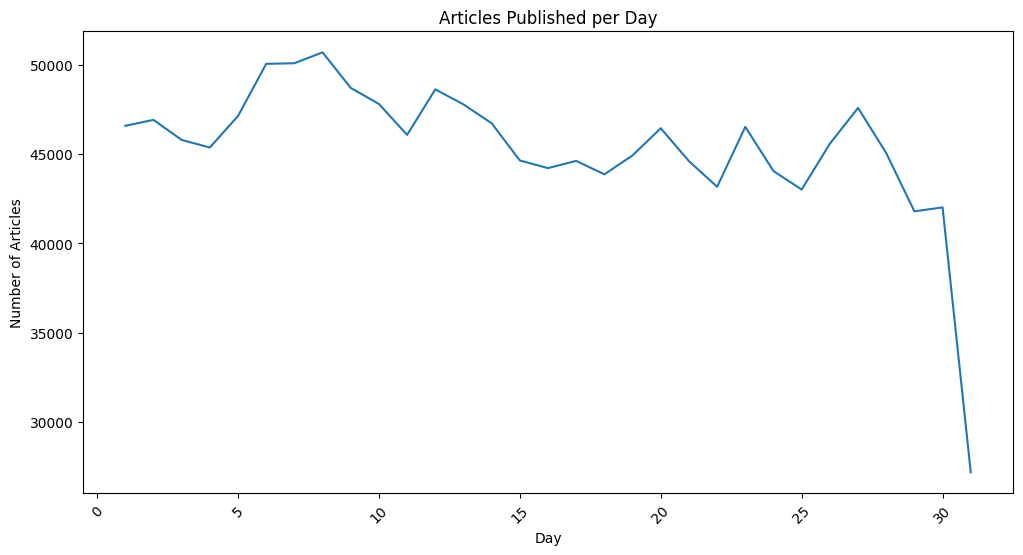

In [12]:
# Visualize articles by day
plt.figure(figsize=(12, 6))
plt.plot(articles_by_day.index, articles_by_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Day')
plt.xticks(rotation=45)
plt.show()

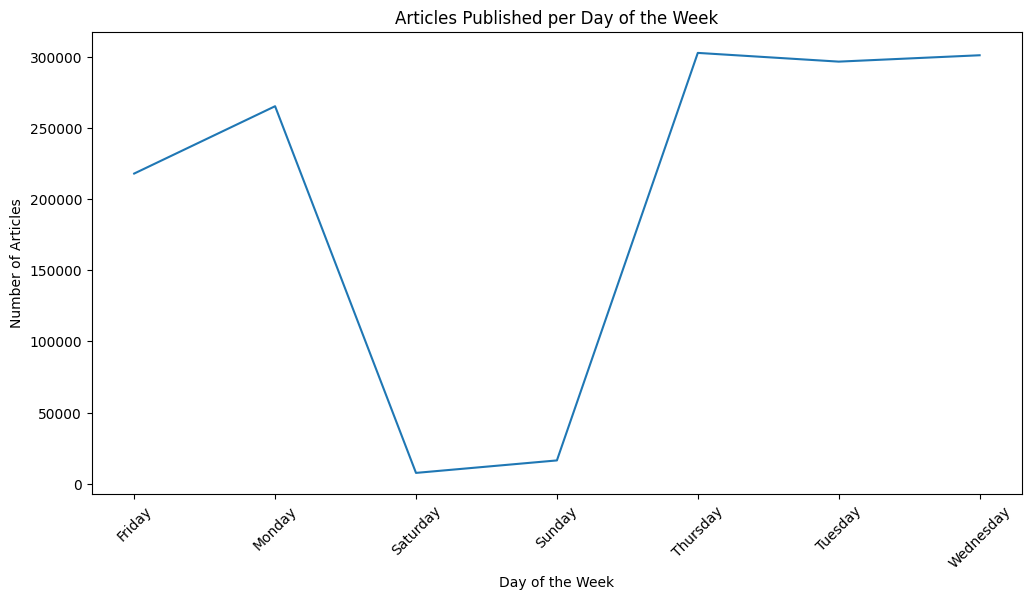

In [13]:
# Visualize articles by day of the week
plt.figure(figsize=(12, 6))
plt.plot(articles_by_day_of_week.index, articles_by_day_of_week.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Day of the Week')
plt.xticks(rotation=45)
plt.show()

>> ## Text Analysis(Sentiment analysis & Topic Modeling)

In [14]:
from scripts.getSentiment import get_sentiment
from scripts.getSentiment import classify_sentiment_score

news['sentiment_score'] = news['headline'].apply(get_sentiment)
news['sentiment_score_class'] = news['sentiment_score'].apply(classify_sentiment_score)
print(news[['headline', 'sentiment_score','sentiment_score_class']].head(40))

                                             headline  sentiment_score  \
0             Stocks That Hit 52-Week Highs On Friday         0.000000   
1          Stocks That Hit 52-Week Highs On Wednesday         0.000000   
2                       71 Biggest Movers From Friday         0.000000   
3        46 Stocks Moving In Friday's Mid-Day Session         0.000000   
4   B of A Securities Maintains Neutral on Agilent...         0.000000   
5   CFRA Maintains Hold on Agilent Technologies, L...         0.000000   
6   UBS Maintains Neutral on Agilent Technologies,...         0.000000   
7   Agilent Technologies shares are trading higher...         0.250000   
8   Wells Fargo Maintains Overweight on Agilent Te...         0.000000   
9          10 Biggest Price Target Changes For Friday         0.000000   
10    30 Stocks Moving in Friday's Pre-Market Session         0.000000   
11  SVB Leerink Maintains Outperform on Agilent Te...         0.000000   
12  8 Stocks Moving In Thursday's Afte

In [30]:
news['sentiment_score_class'].value_counts()

sentiment_score_class
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64

In [ ]:
apple_data = news[news['stock'] == 'AAPL']
apple_data.head()


>>> #### Keyword and topic identification

In [16]:
import nltk
print(nltk.data.path)

['/home/aman/nltk_data', '/home/aman/Documents/10Academy/week1/Stock Market Prediction/.venv/nltk_data', '/home/aman/Documents/10Academy/week1/Stock Market Prediction/.venv/share/nltk_data', '/home/aman/Documents/10Academy/week1/Stock Market Prediction/.venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
    
    return ' '.join(tokens)

# Apply preprocessing
news['processed_headline'] = news['headline'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/aman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/aman/nltk_data'
    - '/home/aman/Documents/10Academy/week1/Stock Market Prediction/.venv/nltk_data'
    - '/home/aman/Documents/10Academy/week1/Stock Market Prediction/.venv/share/nltk_data'
    - '/home/aman/Documents/10Academy/week1/Stock Market Prediction/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


>> ## Time Series Analysis

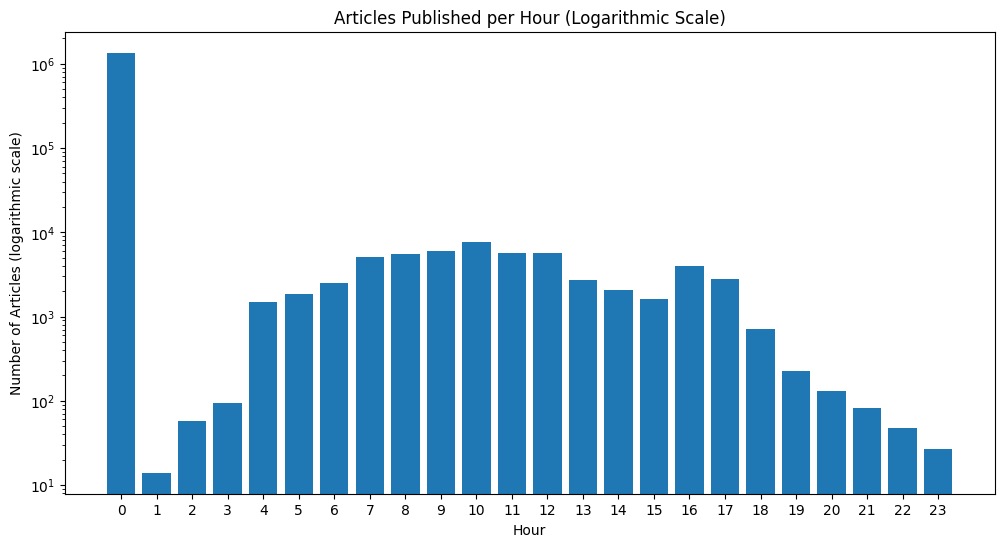

In [18]:
# Analysis of publishing times might reveal if there’s a 
# specific time when most news is released, which could be crucial for traders and automated trading systems.
news['date'] = pd.to_datetime(news['date'])
news['publication_hour'] = news['date'].dt.hour
articles_by_hour = news.groupby('publication_hour').size()

# Visualize the trend
plt.figure(figsize=(12, 6))
plt.bar(articles_by_hour.index, articles_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Articles (logarithmic scale)')
plt.title('Articles Published per Hour (Logarithmic Scale)')
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xticks(range(24))
plt.show()

>> ### Publisher Analysis

In [19]:
publisher_counts = news['publisher'].value_counts()
total_articles = news.shape[0]
publisher_percentages = (publisher_counts / total_articles) * 100
dominant_publishers = publisher_percentages[publisher_percentages > 10].index

print("Dominant publishers:")
print(dominant_publishers,'\n\n')

# Step 2: Filter data for dominant publishers
dominant_news = news[news['publisher'].isin(dominant_publishers)]

# Ensure 'sentiment_score' is the correct column name for sentiment values
dominant_news['sentiment_category'] = dominant_news['sentiment_score'].apply(classify_sentiment_score)

# Step 4: Count sentiments by publisher
sentiment_counts = dominant_news.groupby(['publisher', 'sentiment_category']).size().unstack(fill_value=0)

# Step 5: Print the results
for publisher in dominant_publishers:
    print(f"{publisher}:")
    if publisher in sentiment_counts.index:
        counts = sentiment_counts.loc[publisher]
        print(f"  - positive sentiment     {counts.get('Positive', 0)} times")
        print(f"  - negative sentiment     {counts.get('Negative', 0)} times")
        print(f"  - neutral sentiment      {counts.get('Neutral', 0)} times")
    else:
        print("  No data available")

Dominant publishers:
Index(['Paul Quintaro', 'Lisa Levin', 'Benzinga Newsdesk'], dtype='object', name='publisher') 


Paul Quintaro:
  - positive sentiment     36218 times
  - negative sentiment     22793 times
  - neutral sentiment      169362 times
Lisa Levin:
  - positive sentiment     43149 times
  - negative sentiment     15291 times
  - neutral sentiment      128539 times
Benzinga Newsdesk:
  - positive sentiment     58234 times
  - negative sentiment     21949 times
  - neutral sentiment      70301 times


/tmp/ipykernel_6382/627476050.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant_news['sentiment_category'] = dominant_news['sentiment_score'].apply(classify_sentiment_score)


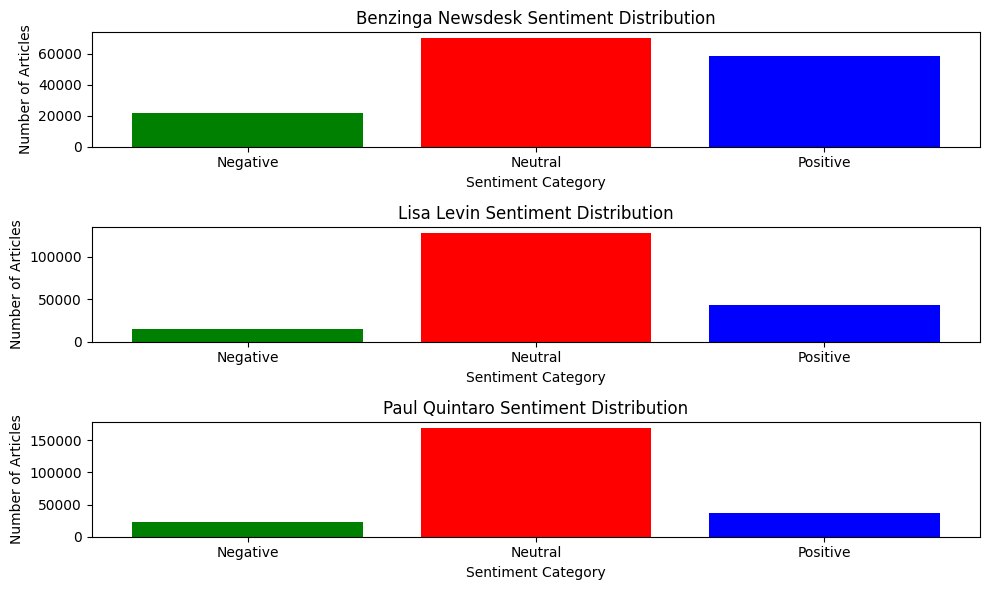

In [26]:
publishers = sentiment_counts.index.to_numpy()
sentiment_labels = sentiment_counts.columns.to_numpy()
sentiment_data = sentiment_counts.values

# Create subplots for each publisher
fig, axes = plt.subplots(len(publishers), 1, figsize=(10, 6))

# Iterate through publishers and create histograms
for i, publisher in enumerate(publishers):
    ax = axes[i]
    ax.bar(sentiment_labels, sentiment_data[i], color=['green', 'red', 'blue'])
    ax.set_title(f"{publisher} Sentiment Distribution")
    ax.set_xlabel("Sentiment Category")
    ax.set_ylabel("Number of Articles")
    ax.set_xticks(sentiment_labels)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

>>> #### Identify domains

In [13]:
import re

# Extract email domains
def extract_domain(email):
    if '@' in email:
        return email.split('@')[1]
    else:
        return None  # Or handle invalid email addresses as needed

news['publisher_domain'] = news['publisher'].apply(extract_domain)

# Count unique domains
domain_counts = news['publisher_domain'].value_counts()

# Calculate domain contribution
total_articles = news.shape[0]
domain_percentages = (domain_counts / total_articles) * 100

# Identify dominant domains
dominant_domains = domain_percentages[domain_percentages > 0]  # Adjust threshold as needed

print("Dominant domains:")
print(domain_counts)

Dominant domains:
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [23]:
publisher_sentiment_counts = news.groupby('publisher')['sentiment_score'].value_counts()
total_articles_by_publisher = news.groupby('publisher').size()
publisher_sentiment_percentages = (publisher_sentiment_counts / total_articles_by_publisher).mul(100)
print(publisher_sentiment_percentages)


publisher    sentiment_score
47ertrends    0.000000          100.000000
AARP          0.017857           71.428571
              0.000000           28.571429
ABNNewswire   0.000000           38.461538
             -0.035714           30.769231
                                   ...    
webmaster     0.363636            0.004923
              0.383333            0.004923
              0.391667            0.004923
              0.416667            0.004923
              0.650000            0.004923
Length: 27842, dtype: float64


## Quantitative analysis using pynance and TaLib

In [2]:
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
stock_data = {}
for stock in stocks:
    file_name = f'../docs/yfinance_data/{stock}_historical_data.csv'
    stock_data[stock] = pd.read_csv(file_name)
print("\n\t\tAAPL\n",stock_data['AAPL'].head())
print("\n\n\t\tAMZN\n",stock_data['AMZN'].head())


		AAPL
          Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


		AMZN
          Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-2

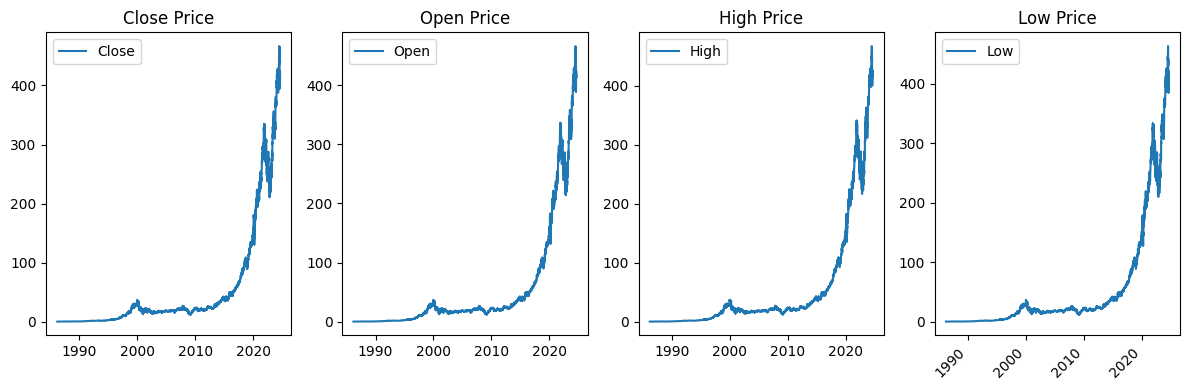

In [3]:
import yfinance as yf
import matplotlib.dates as mdates

# Download Microsoft stock data
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")

# Create a figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Plot Close price
axes[0].plot(hist.index, hist['Close'], label='Close')
axes[0].set_title('Close Price')
axes[0].legend()

# Plot Open price
axes[1].plot(hist.index, hist['Open'], label='Open')
axes[1].set_title('Open Price')
axes[1].legend()

# Plot High price
axes[2].plot(hist.index, hist['High'], label='High')
axes[2].set_title('High Price')
axes[2].legend()

# Plot Low price
axes[3].plot(hist.index, hist['Low'], label='Low')
axes[3].set_title('Low Price')
axes[3].legend()

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Rotate x-axis labels for readability
plt.setp(axes[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
import sys
import traceback
sys.path.append('..')
from scripts.financeAnalyzer import *

analyzer = {}
try:
    for stock in stocks:
        analyzer[stock] = FinancialAnalyzer(stock, '2020-01-01', '2020-12-31')
        analyzer[stock+'data'] = analyzer[stock].retrieve_stock_data()
        analyzer[stock+'stock_data_indicators'] = analyzer[stock].calculate_technical_indicators(analyzer[stock+'data'])
except Exception as e:
    print("An error occurred:")
    print(traceback.format_exc())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
from IPython.display import display
stock_ = 'AMZN'
for stock in stocks:
    if stock+'stock_data_indicators' in analyzer:
        display(stock+" :",analyzer[stock+'stock_data_indicators'].tail())
    else:
        print(f"no data for {stock+'stock_data_indicators'}")

'AAPL :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200790,88223700,124.106000,66.417825,124.898504,3.154518,2.500894
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189514,54930100,124.903000,67.866386,125.571980,3.323474,2.665410
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200,125.908001,73.597952,126.630839,3.794496,2.891227
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028412,121047300,126.699000,68.522632,127.415521,3.975103,3.108002
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902634,96452100,127.249000,65.451324,128.015948,3.979567,3.282315


'AMZN :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,160.250000,160.506500,159.208496,159.263504,159.263504,41876000,158.943800,51.353673,158.909041,0.551435,0.294464
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,158.912850,49.701582,158.882895,0.456073,0.326786
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,159.134400,61.499634,159.389095,0.819974,0.425423
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,159.519301,64.560168,160.028229,1.247464,0.589831
2020-12-30,167.050003,167.104996,164.123505,164.292496,164.292496,64186000,159.683726,59.703015,160.434350,1.423987,0.756662


'GOOG :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,86.405502,87.399498,86.251999,86.619003,86.520546,20676000,88.876050,45.527469,87.832419,0.111825,0.764340
2020-12-24,86.750000,87.300003,86.455498,86.942497,86.843674,6936000,88.794600,47.241365,87.747665,0.044445,0.620361
2020-12-28,87.581749,89.536400,87.316750,88.804497,88.703560,27860000,88.751849,55.851683,87.848316,0.139684,0.524226
2020-12-29,89.389503,89.622002,87.804497,87.935997,87.836044,25988000,88.746799,51.619952,87.856666,0.143428,0.448066
2020-12-30,88.100502,88.254753,86.279999,86.975998,86.877136,26122000,88.600349,47.349418,87.772793,0.068145,0.372082


'META :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,266.890015,272.170013,266.230011,268.109985,267.560181,14329000,277.391998,41.499879,275.052071,-1.509578,-0.128076
2020-12-24,268.880005,270.399994,266.200012,267.399994,266.851624,6702000,276.982498,40.816370,274.323301,-1.908274,-0.484116
2020-12-28,268.739990,277.299988,265.660004,277.000000,276.431946,23299700,276.941998,52.264648,274.578225,-1.433083,-0.673909
2020-12-29,276.950012,280.510010,276.279999,276.779999,276.212402,16383000,276.932498,52.016325,274.787918,-1.062002,-0.751528
2020-12-30,277.950012,278.079987,271.709991,271.869995,271.312469,11803800,276.198499,46.685088,274.510020,-1.150847,-0.831392


'MSFT :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,223.110001,223.559998,220.800003,221.020004,214.069550,18699600,216.120000,58.745034,217.016980,2.049319,1.156069
2020-12-24,221.419998,223.610001,221.199997,222.750000,215.745163,10550600,216.564000,61.218878,217.562982,2.243198,1.373495
2020-12-28,224.449997,226.029999,223.020004,224.960007,217.885681,17933500,217.050500,64.174327,218.267460,2.545830,1.607962
2020-12-29,226.309998,227.179993,223.580002,224.149994,217.101135,17403200,217.554500,62.300298,218.827702,2.689306,1.824231
2020-12-30,225.229996,225.630005,221.470001,221.679993,214.708801,20272300,217.827999,56.848681,219.099348,2.574032,1.974191


'NVDA :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,13.25600,13.27500,13.00500,13.00925,12.978319,179144000,13.290200,43.870647,13.265758,-0.036483,-0.024388
2020-12-24,13.03725,13.13250,12.93875,12.99375,12.962855,97884000,13.278150,43.562278,13.239853,-0.053445,-0.030200
2020-12-28,13.06250,13.06250,12.76325,12.90000,12.869329,212564000,13.260088,41.655119,13.207486,-0.073604,-0.038880
2020-12-29,12.92500,13.07250,12.84225,12.94325,12.912477,170372000,13.237175,42.897155,13.182321,-0.085109,-0.048126
2020-12-30,12.99025,13.21375,12.89675,13.14575,13.114496,225396000,13.224963,48.432346,13.178838,-0.076999,-0.053901


'TSLA :'

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,206.491165,60.674294,203.236988,14.133413,15.195248
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,207.953999,62.871930,204.889656,13.818634,14.919925
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,209.252832,63.141653,206.445879,13.465589,14.629058
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,210.892666,63.483883,207.926907,13.096692,14.322585
2020-12-30,224.000000,232.199997,222.786667,231.593338,231.593338,128538000,212.726333,67.545921,210.180853,13.423966,14.142861


AAPL:



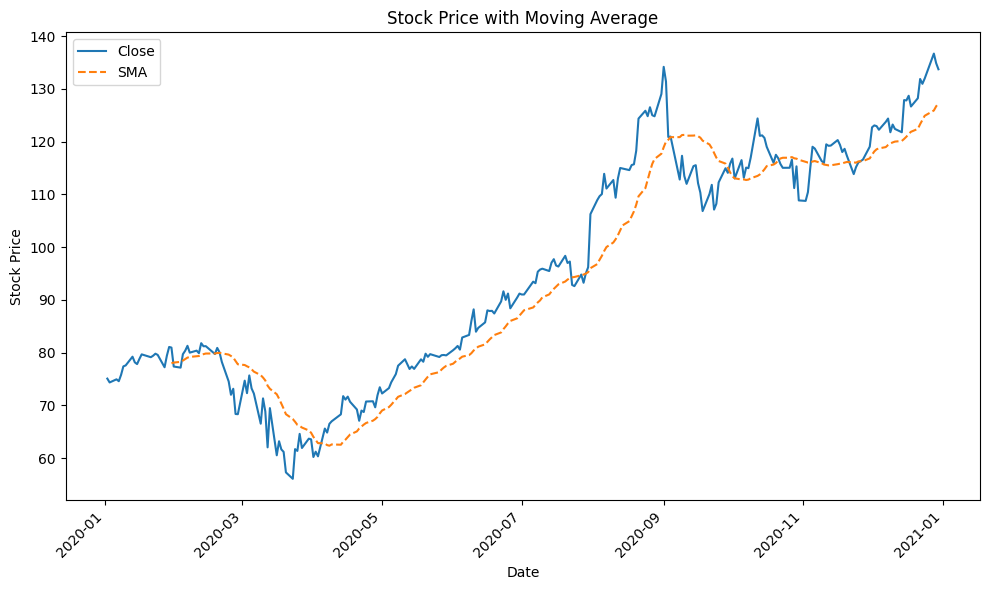

None




AMZN:



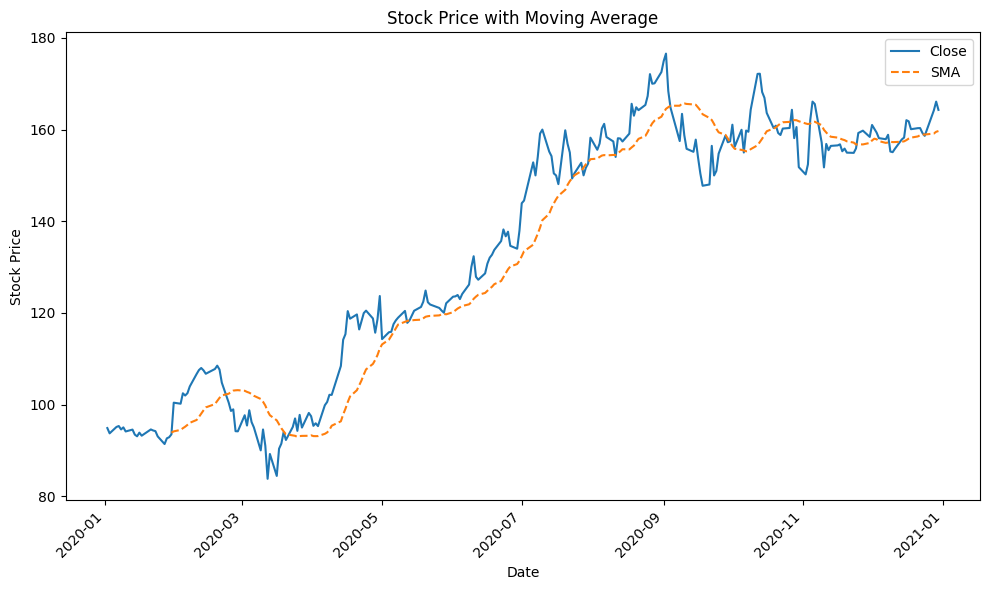

None




GOOG:



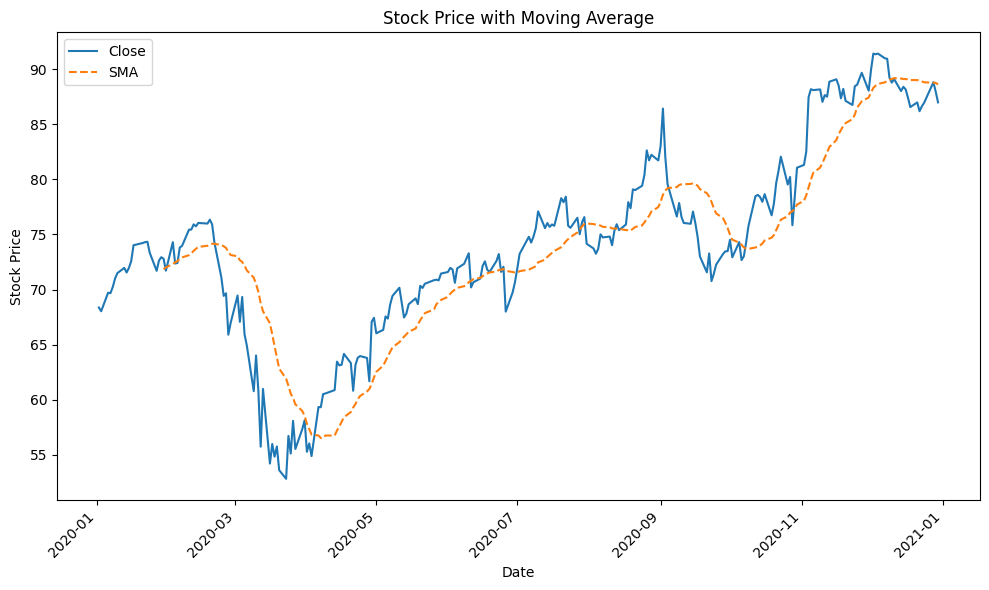

None




META:



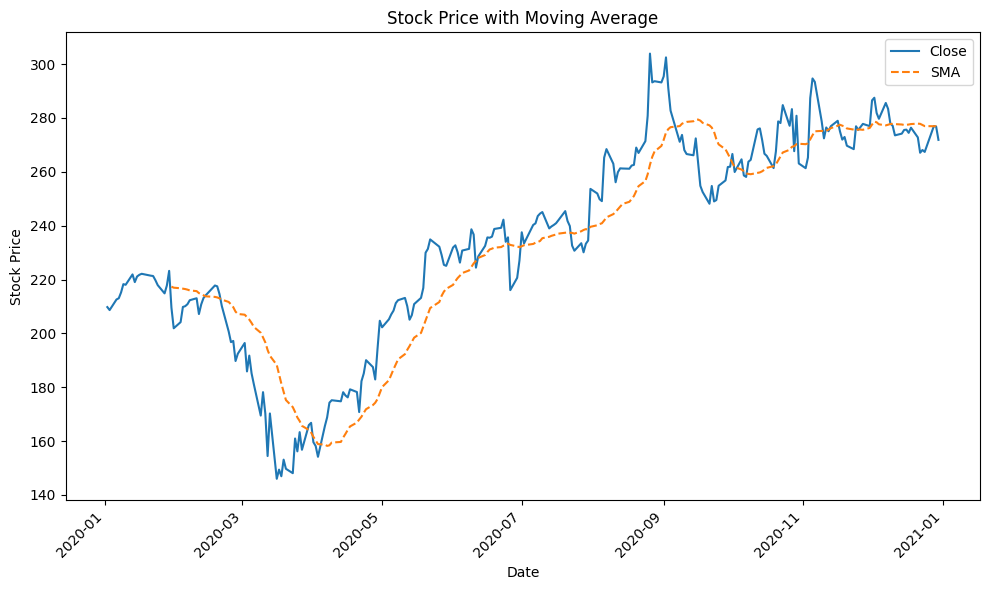

None




MSFT:



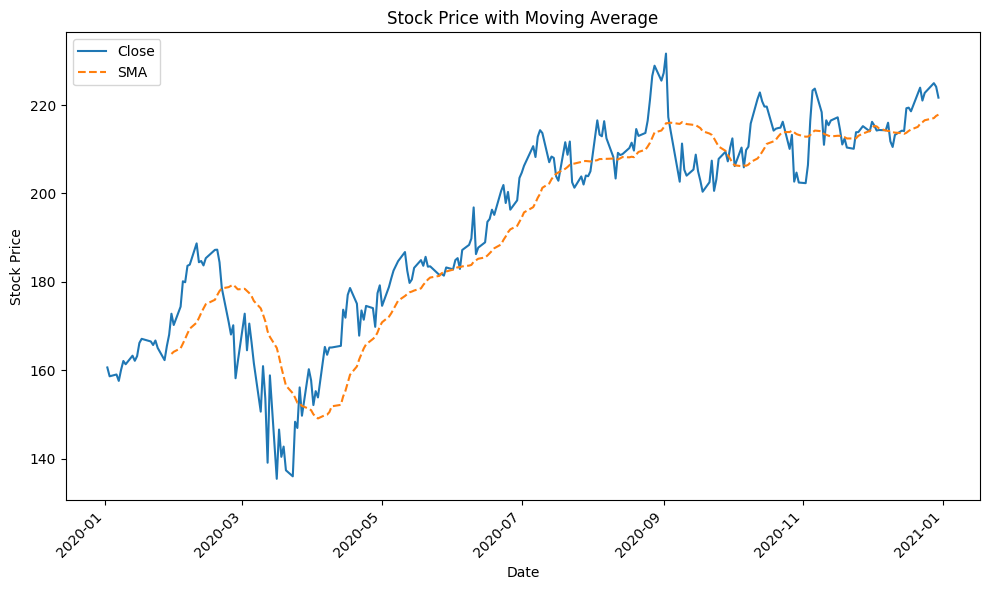

None




NVDA:



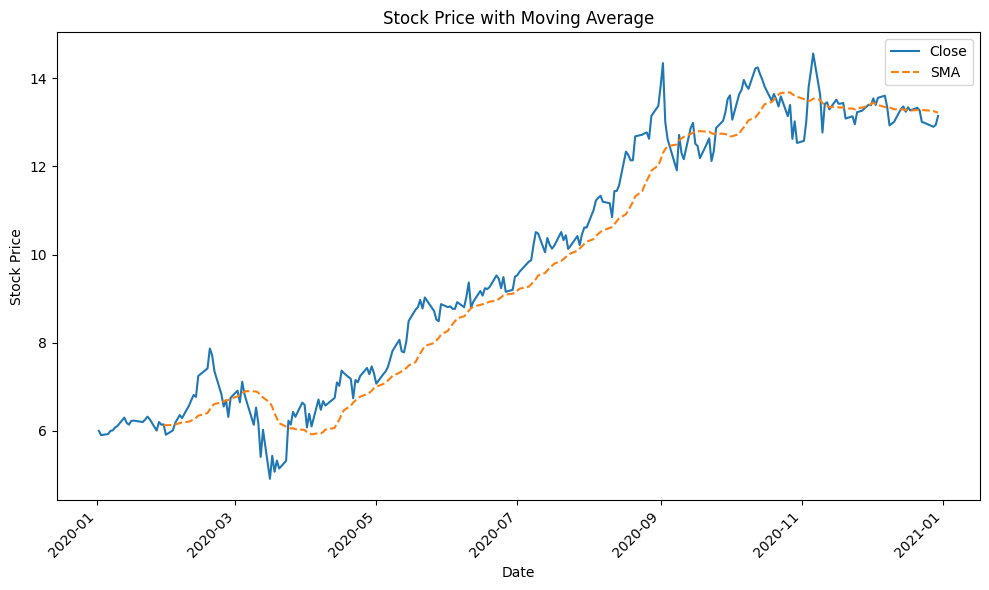

None




TSLA:



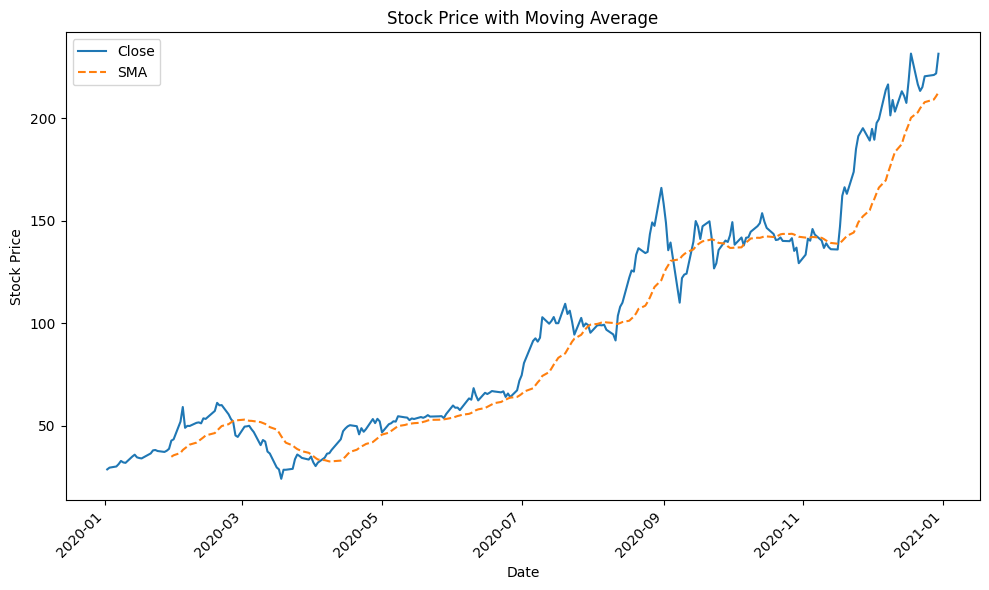

None

In [6]:
for stock in stocks:
    print(stock+":\n")
    display(analyzer[stock].plot_stock_data(analyzer[f'{stock}data']))
    print("\n\n")

AAPL:



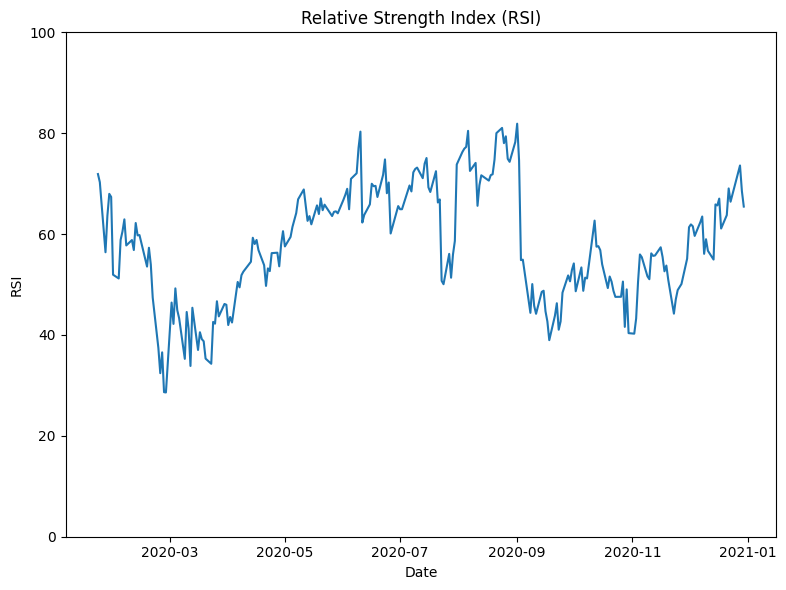

None




AMZN:



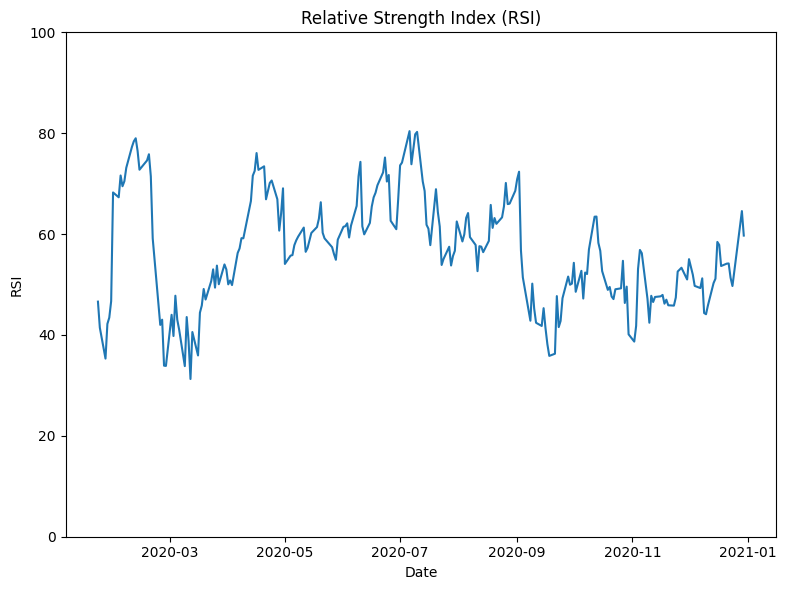

None




GOOG:



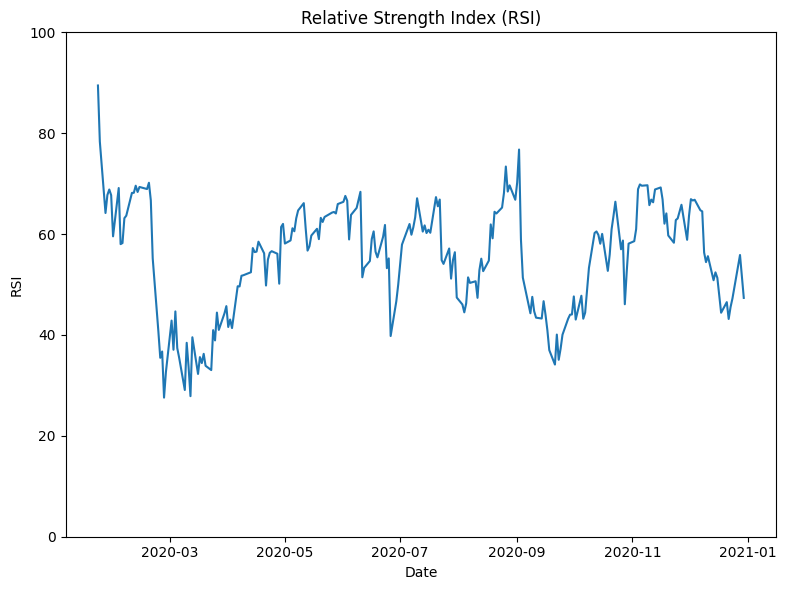

None




META:



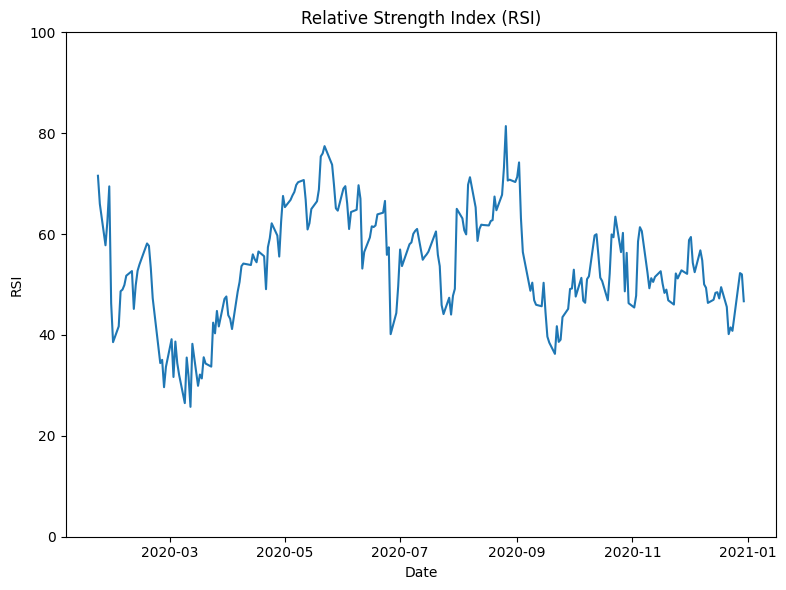

None




MSFT:



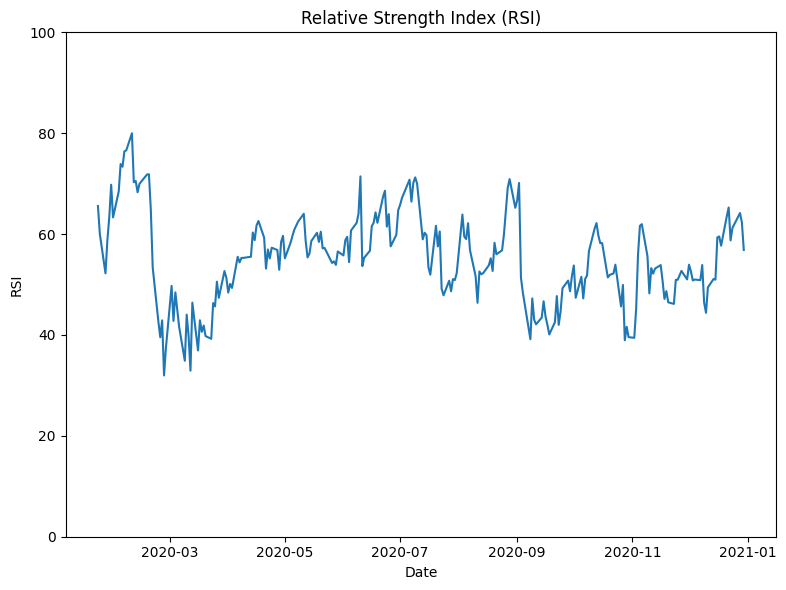

None




NVDA:



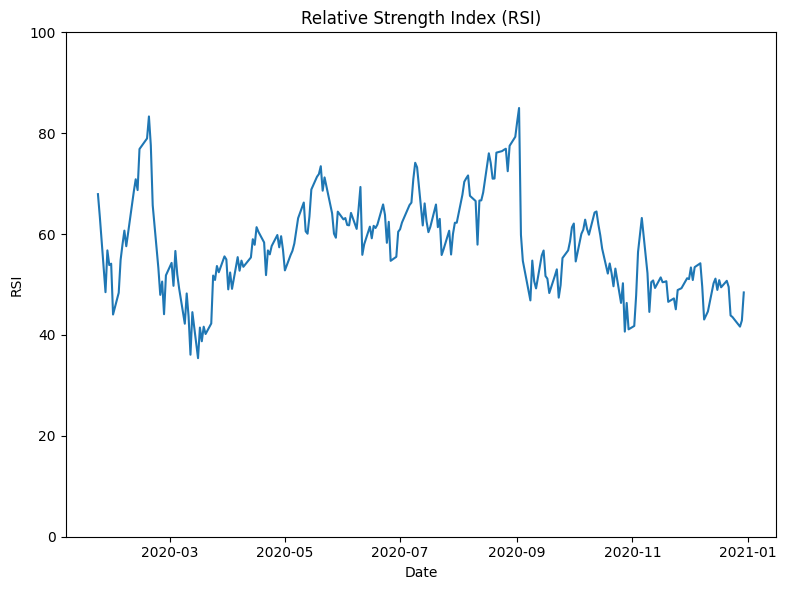

None




TSLA:



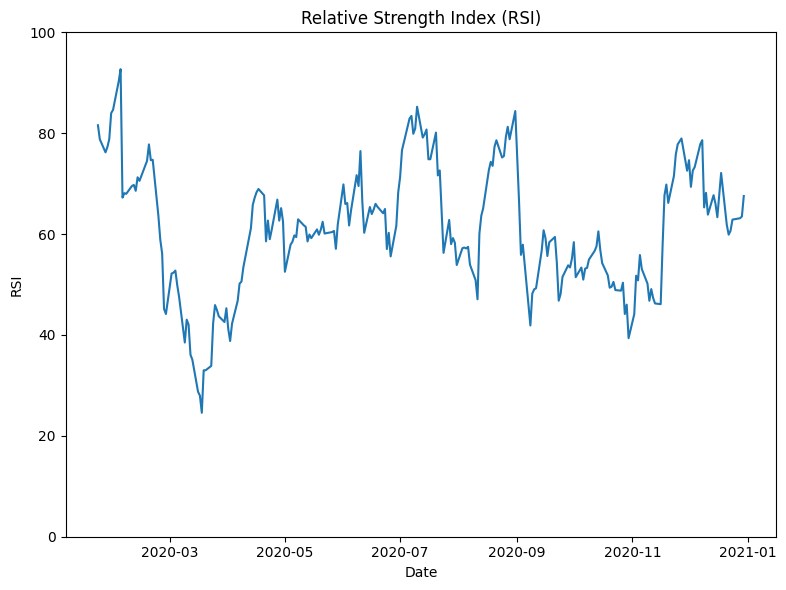

None

In [8]:

for stock in stocks:
    print(stock+":\n")
    display(analyzer[stock].plot_rsi(analyzer[f'{stock}data']))
    print("\n\n")

AAPL:



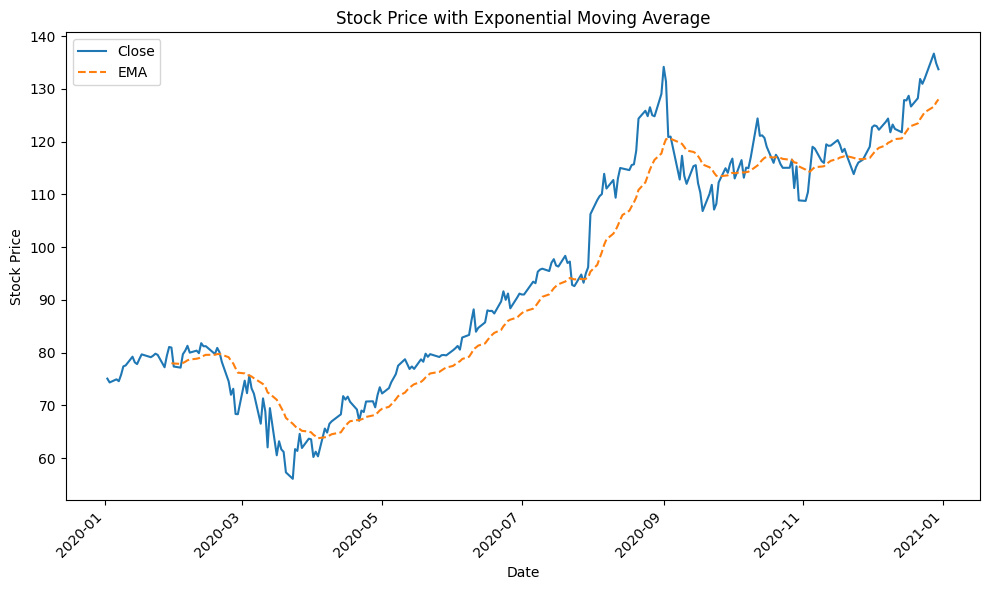

None




AMZN:



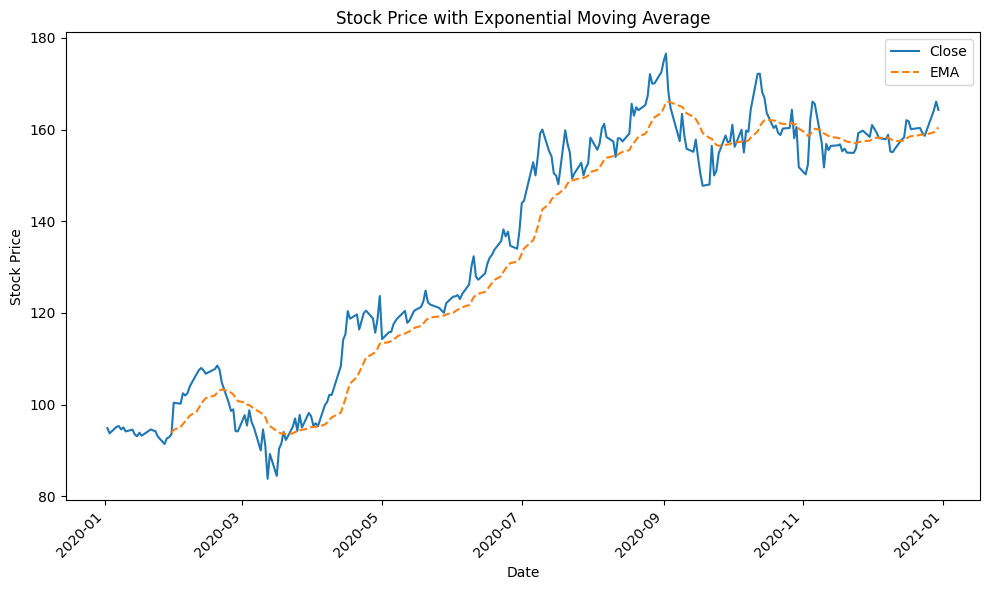

None




GOOG:



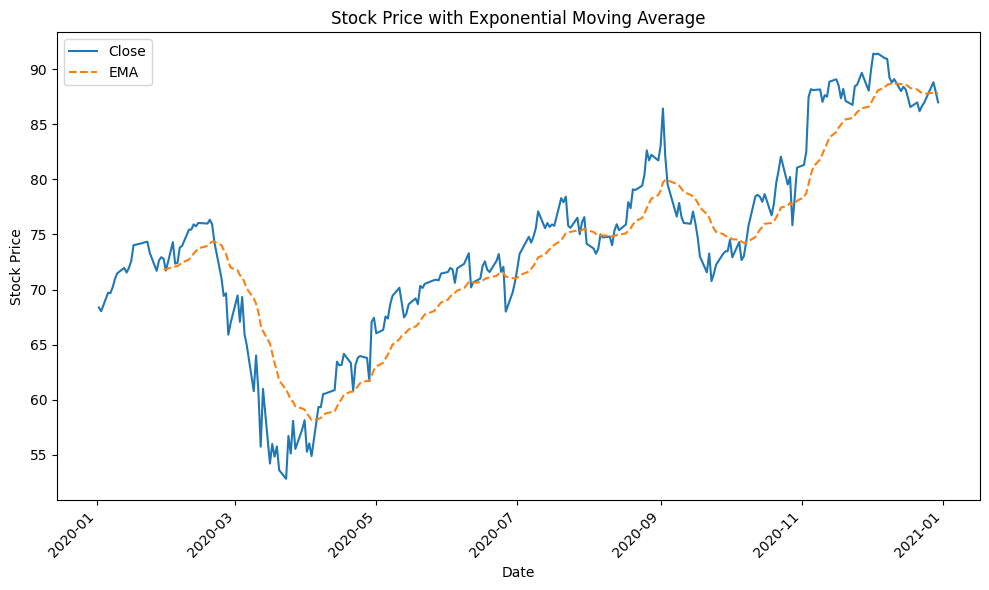

None




META:



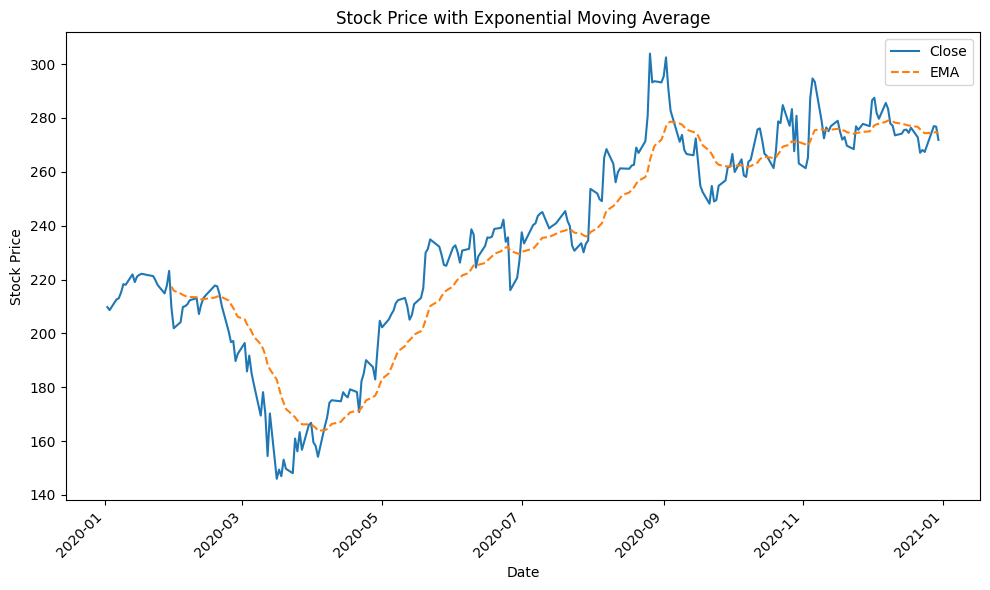

None




MSFT:



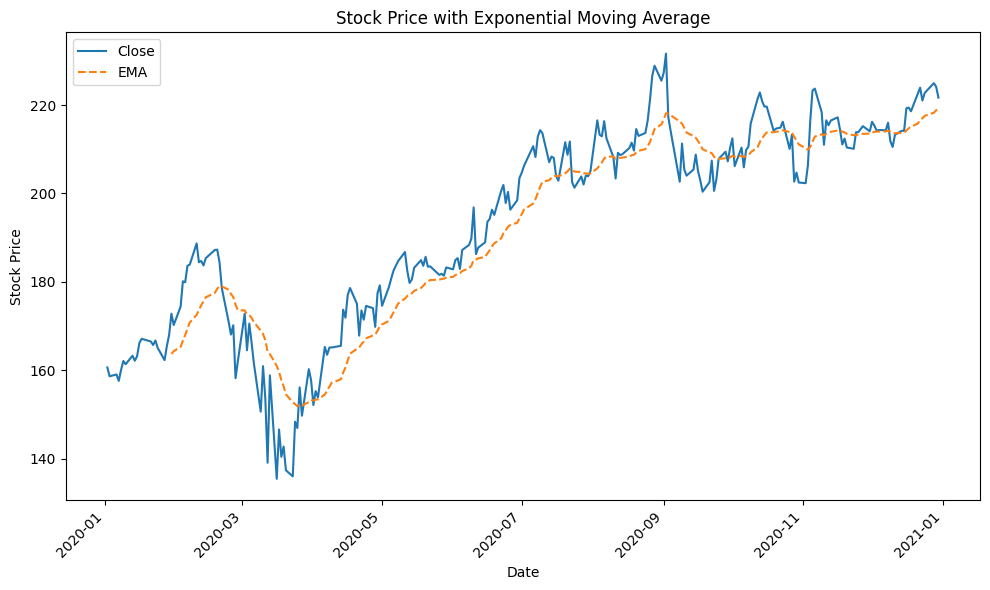

None




NVDA:



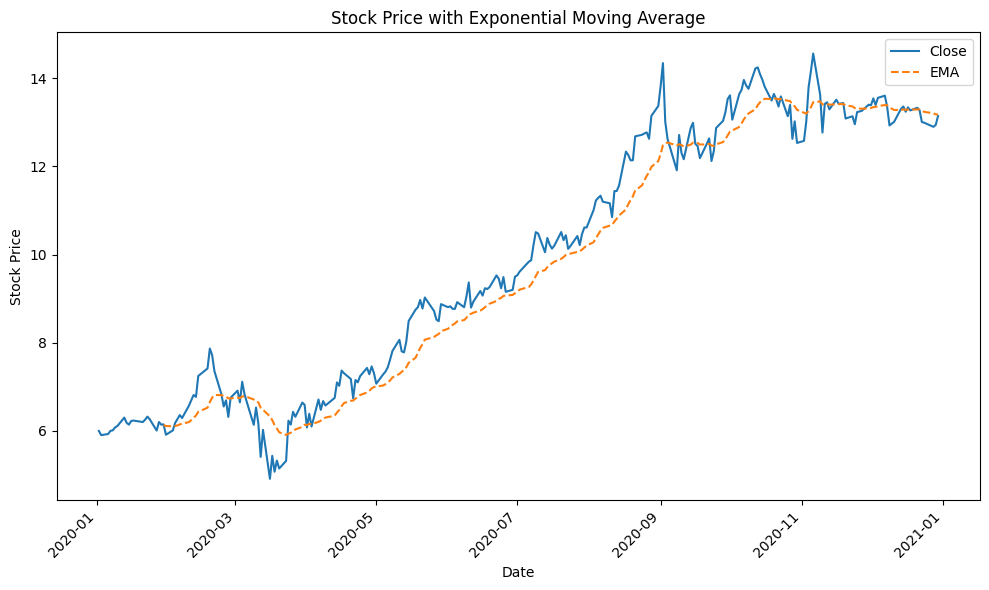

None




TSLA:



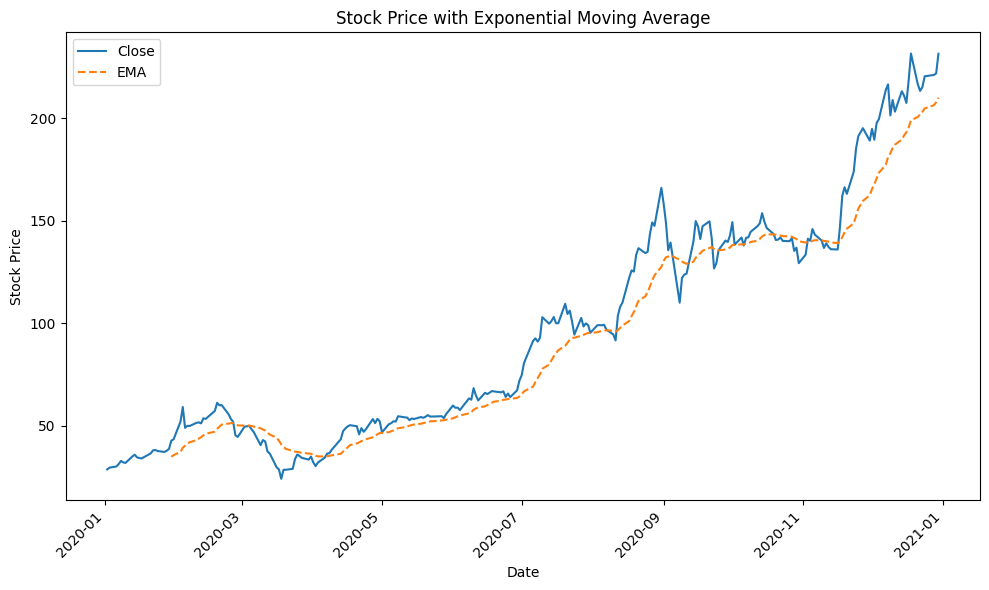

None

In [9]:
for stock in stocks:
    print(stock+":\n")
    display(analyzer[stock].plot_ema(analyzer[stock+'data']))
    print("\n\n")

AAPL:



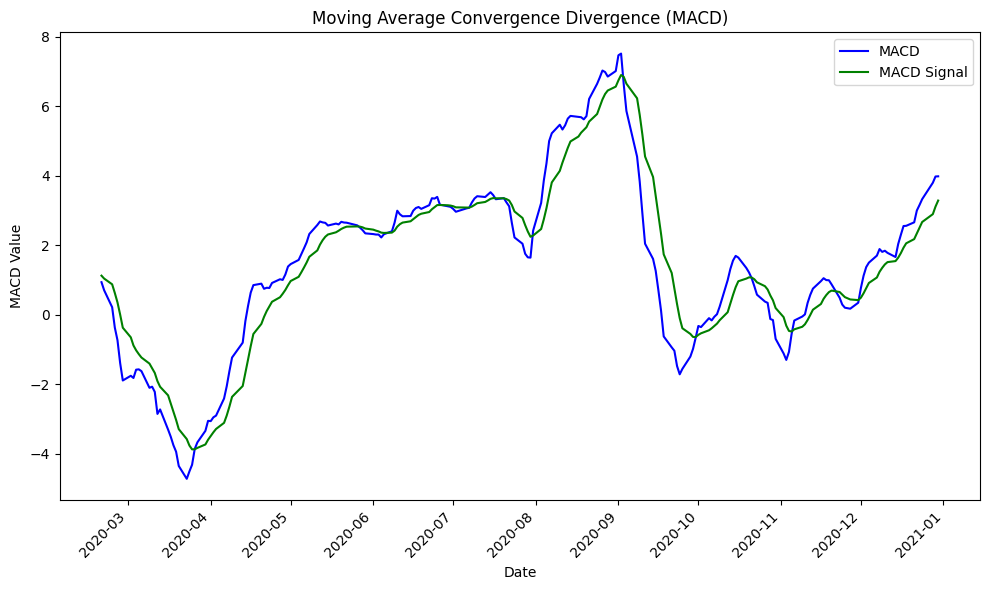

None




AMZN:



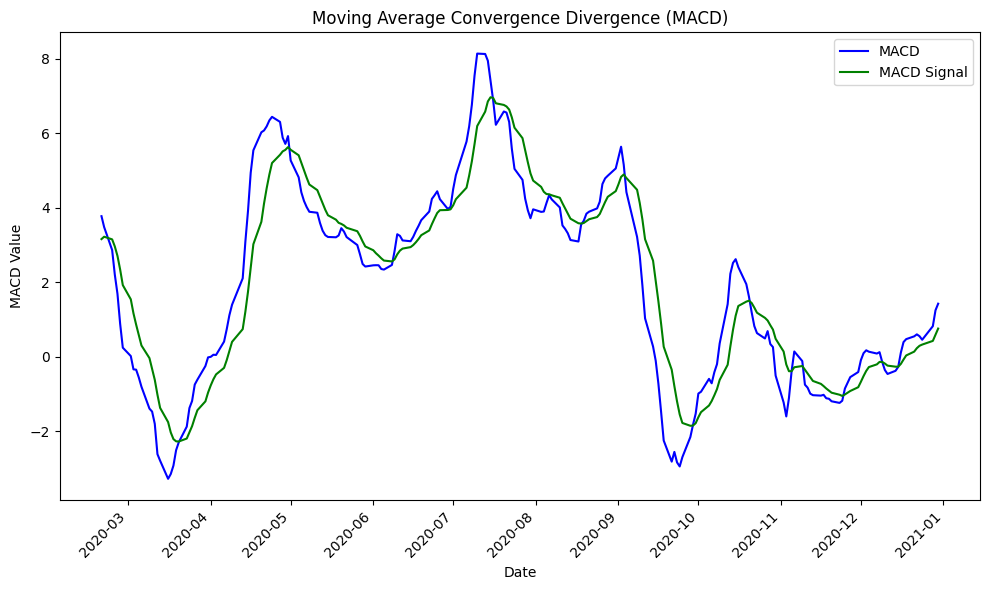

None




GOOG:



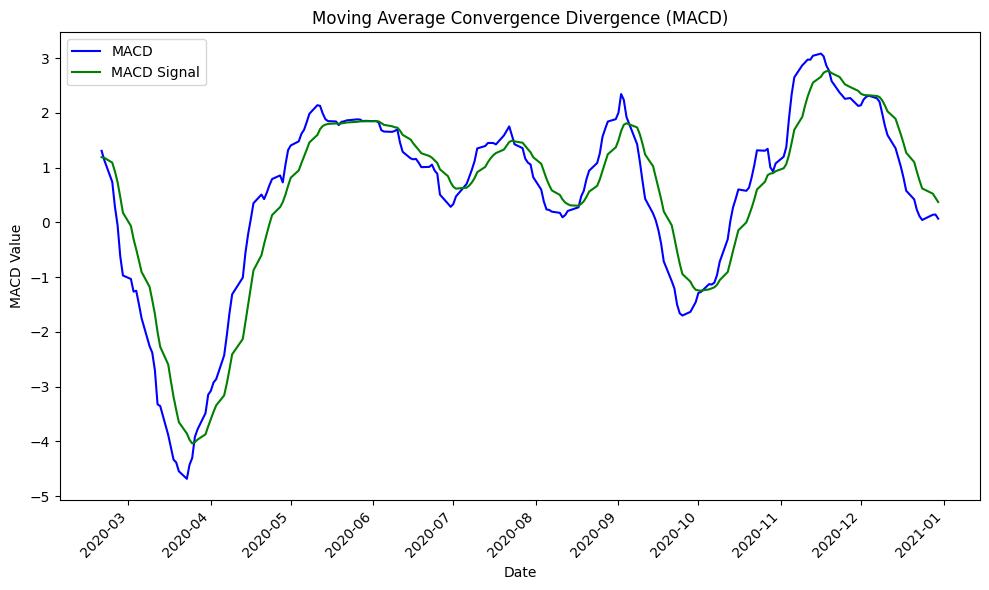

None




META:



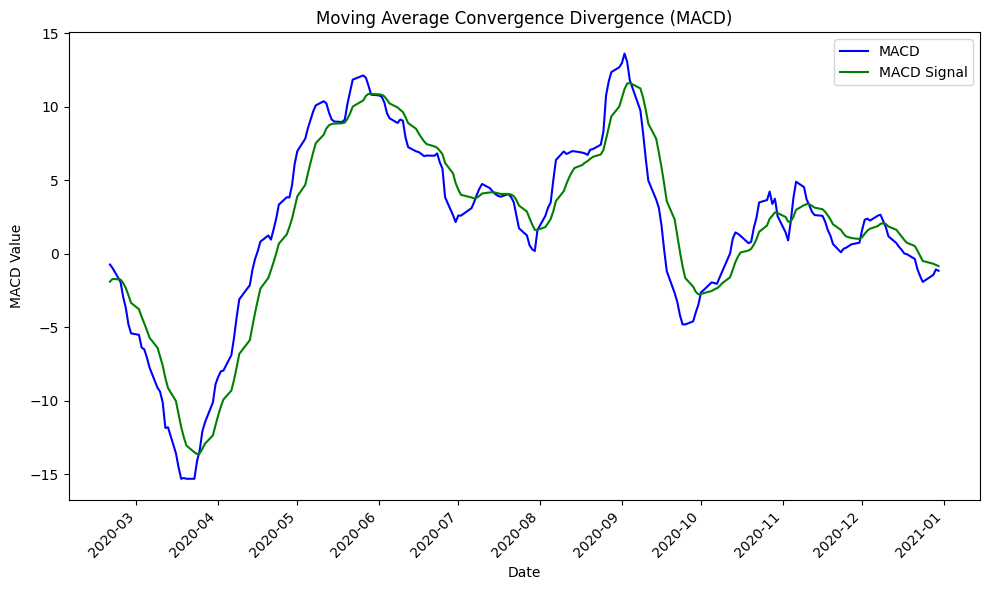

None




MSFT:



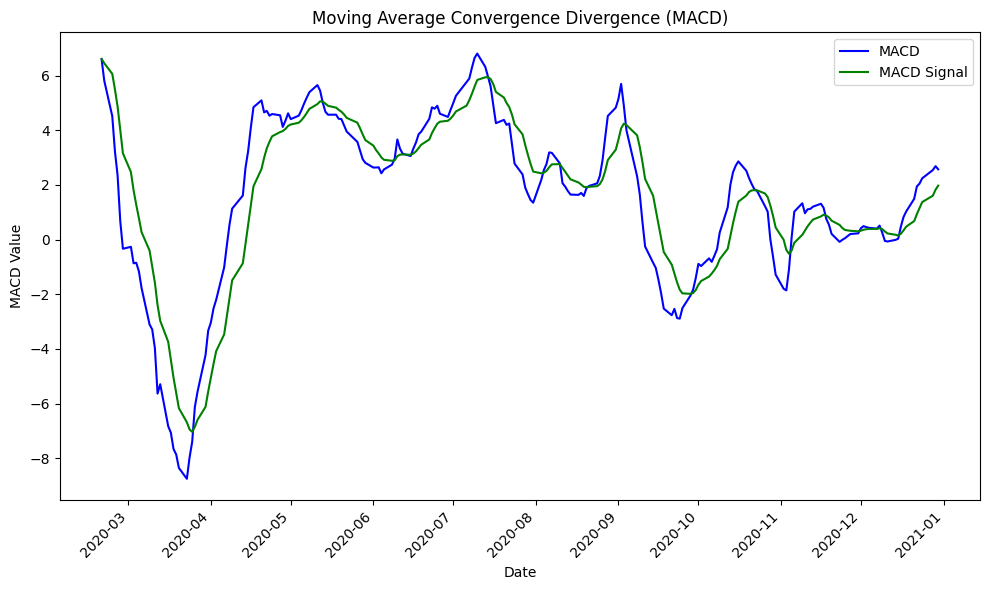

None




NVDA:



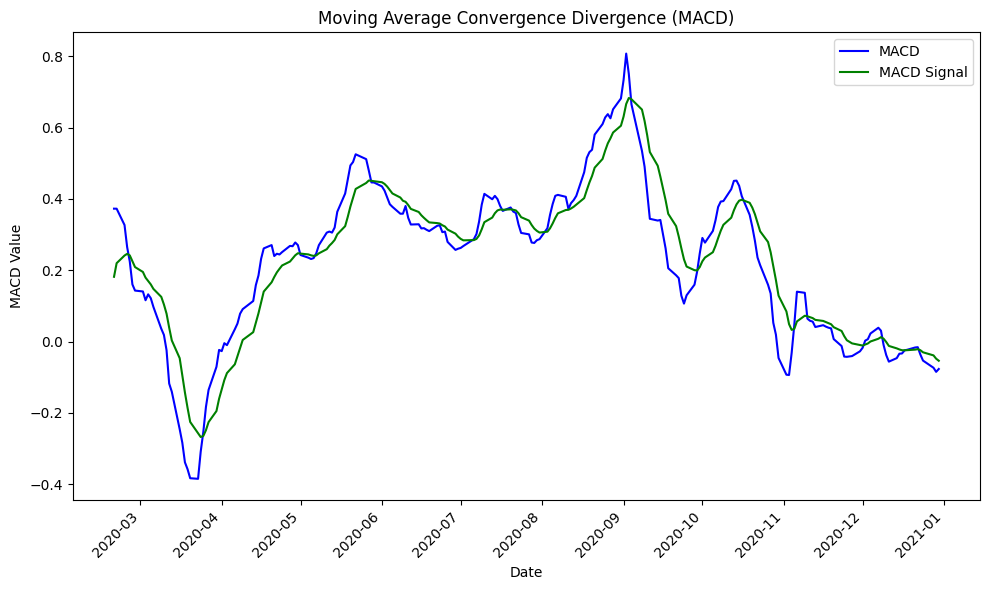

None




TSLA:



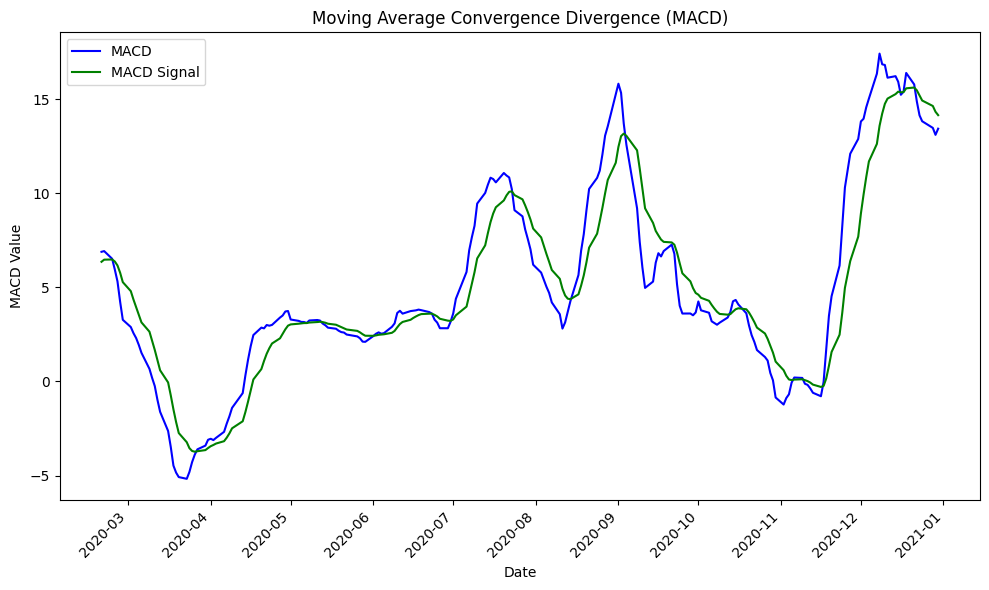

None

In [10]:
for stock in stocks:
    print(stock+":\n")
    display(analyzer[stock].plot_macd(analyzer[stock+'data']))
    print("\n\n")

In [11]:
weights = analyzer[stock].calculate_portfolio_weights(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(weights)

[*********************100%***********************]  3 of 3 completed

{'AAPL': 1.0, 'GOOG': 0.0, 'MSFT': 0.0}


In [12]:
performance = analyzer[stock].calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(performance)

[*********************100%***********************]  3 of 3 completed

(0.7849548651246641, 0.4678973259471033, 1.6348776167426604)


In [13]:
# Calculate portfolio performance

portfolio_return, portfolio_volatility, sharpe_ratio = analyzer[stock].calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(f"Portfolio Return: {portfolio_return:.2f}%")
print(f"Portfolio Volatility: {portfolio_volatility:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

[*********************100%***********************]  3 of 3 completed

Portfolio Return: 0.78%
Portfolio Volatility: 0.47%
Sharpe Ratio: 1.63


## **Historical Data**

>> ### AAPL Historical Data

In [4]:
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
stock_data = {}
for stock in stocks:
    file_name = f'../docs/yfinance_data/{stock}_historical_data.csv'
    stock_data[stock] = pd.read_csv(file_name)
print(stock_data['AAPL'].head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
print(stock_data['AAPL'].head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
for stock in stocks:
    stock_data[stock]['Date'] = formatDate(stock_data[stock],True)

#### Number of articles over time

### Data Integration

In [15]:
news_data_aapl = news[news['stock'] == 'AAPL']
news_data_aapl = news_data_aapl[['date', 'sentiment_score']]

In [18]:
# Convert both columns to UTC timezone (assuming they are already in UTC)
stock_data['AAPL']['Date'] = stock_data['AAPL']['Date'].dt.tz_convert('UTC')
news_data_aapl['date'] = news_data_aapl['date'].dt.tz_convert('UTC')

# Merge the dataframes
merged_data_aapl = pd.merge(stock_data['AAPL'], news_data_aapl, left_on='Date', right_on='date', how='left')

# Identify and drop unnecessary cols
merged_data_aapl = merged_data_aapl.drop(['date'], axis=1)

print(merged_data_aapl.head())


                       Date      Open      High       Low     Close  \
0 1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   
1 1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   
2 1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   
3 1980-12-17 00:00:00+00:00  0.115513  0.116071  0.115513  0.115513   
4 1980-12-18 00:00:00+00:00  0.118862  0.119420  0.118862  0.118862   

   Adj Close     Volume  Dividends  Stock Splits sentiment_score  
0   0.098943  469033600        0.0           0.0             NaN  
1   0.093781  175884800        0.0           0.0             NaN  
2   0.086898  105728000        0.0           0.0             NaN  
3   0.089049   86441600        0.0           0.0             NaN  
4   0.091630   73449600        0.0           0.0             NaN  


### Daily Stock Returns

In [19]:
merged_data_aapl['Daily Return'] = merged_data_aapl['Close'].pct_change()

# Fill NaN values that may result from pct_change
merged_data_aapl['Daily Return'].fillna(0, inplace=True)
print(merged_data_aapl.head())

                       Date      Open      High       Low     Close  \
0 1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   
1 1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   
2 1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   
3 1980-12-17 00:00:00+00:00  0.115513  0.116071  0.115513  0.115513   
4 1980-12-18 00:00:00+00:00  0.118862  0.119420  0.118862  0.118862   

   Adj Close     Volume  Dividends  Stock Splits sentiment_score  Daily Return  
0   0.098943  469033600        0.0           0.0             NaN      0.000000  
1   0.093781  175884800        0.0           0.0             NaN     -0.052171  
2   0.086898  105728000        0.0           0.0             NaN     -0.073398  
3   0.089049   86441600        0.0           0.0             NaN      0.024751  
4   0.091630   73449600        0.0           0.0             NaN      0.028992  


/tmp/ipykernel_240497/1841543699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_aapl['Daily Return'].fillna(0, inplace=True)


### Correlation Analysis

In [20]:
# Calculate the Pearson correlation between sentiment scores and daily returns
correlation = merged_data_aapl['sentiment_score'].corr(merged_data_aapl['Daily Return'])
print(f'Correlation between sentiment and daily returns for AAPL: {correlation:.2f}')

Correlation between sentiment and daily returns for AAPL: nan


### Visualization

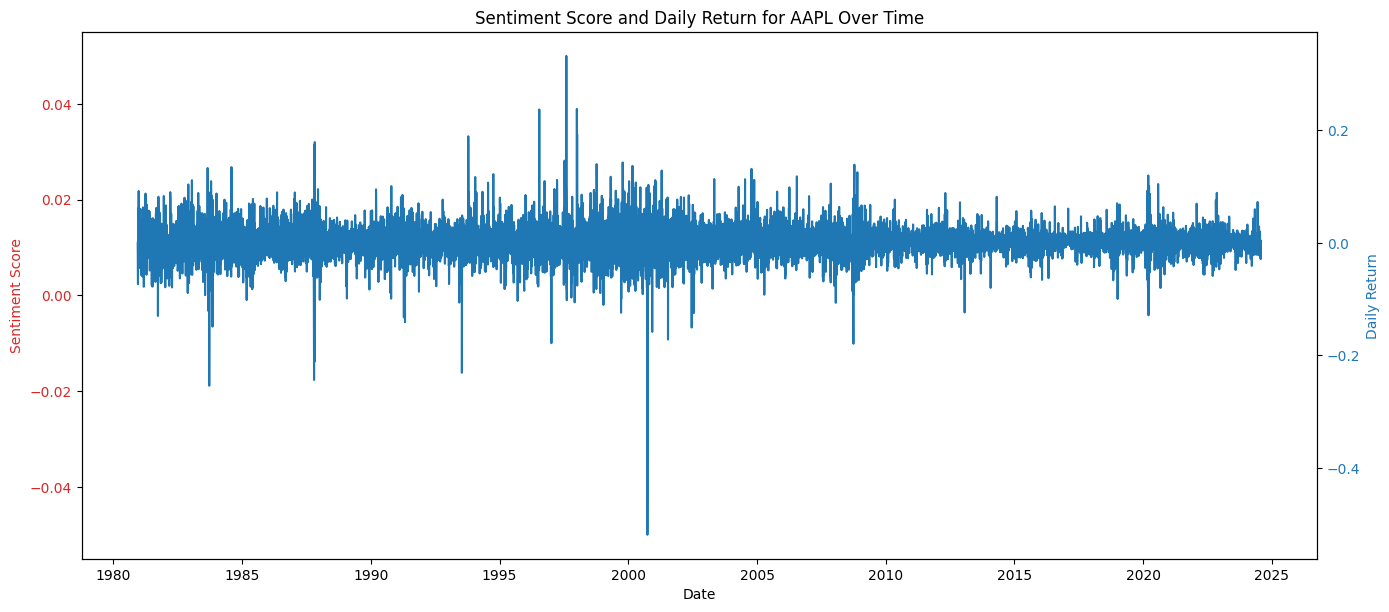

In [21]:
# Plotting sentiment scores and stock returns over time
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color='tab:red')
ax1.plot(merged_data_aapl['Date'], merged_data_aapl['sentiment_score'], color='tab:red', label='Sentiment Score')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', color='tab:blue')
ax2.plot(merged_data_aapl['Date'], merged_data_aapl['Daily Return'], color='tab:blue', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Sentiment Score and Daily Return for AAPL Over Time')
plt.show()


## AAPL Stock

In [8]:
AAPLstock = pd.read_csv('../docs/yfinance_data/AAPL_historical_data.csv')
AAPLstock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
